In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound

#searborn
import seaborn as sns


# library to handle requests
import requests 

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering
from sklearn.cluster import KMeans

# import KElbowVisualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

D:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: ...working... done

# All requested packages already installed.



Read the excel file from Zillow.com that has Seattle Neighorbood information

In [2]:
df_neighborhoods = pd.read_excel("seattle_neighorhoods.xls")
df_neighborhoods.shape

(96, 3)

In [3]:
df_neighborhoods.head()

,Neighborhood,Current ZHVI,Current ZRI
0,Downtown,815000,2656.0
1,Adams,723500,2575.0
2,Admiral,834900,2840.0
3,Alki,880000,2842.0
4,Arbor Heights,624000,2350.0


* ZHVI - Zillow Home Value Index (ZHVI) is a time series tracking the monthly median home value in a particular geographical region
* ZRI - The Zillow Rent Index (ZRI) is a dollar-valued index intended to capture typical market rent.

In [6]:
geolocater= Nominatim(user_agent="Seattle-explorer")

coordinates=[]
empty=[]

def getcoords(neighborhood, add):
    try:
        coords= geolocater.geocode(add, timeout=10)
        coordinates.append([neighborhood, add, coords.latitude, coords.longitude])
        print("the Coordinates are {}".format(coordinates[-1]))
    

    except:
        coordinates.append([neighborhood, add])
        empty.append([add])
        print("Couldn't find Coordinates of {}".format(empty[-1]))        

In [7]:
for i, row in df_neighborhoods.iterrows():
    getcoords(df_neighborhoods.Neighborhood.iloc[i], df_neighborhoods.Neighborhood.iloc[i] + ', Seattle, WA, USA')

the Coordinates are ['Downtown', 'Downtown, Seattle, WA, USA', 47.6048723, -122.3334582]
the Coordinates are ['Adams', 'Adams, Seattle, WA, USA', 47.565271, -122.2795457]
the Coordinates are ['Admiral', 'Admiral, Seattle, WA, USA', 47.5811953, -122.3865457]
the Coordinates are ['Alki', 'Alki, Seattle, WA, USA', 47.5762092, -122.4098507]
the Coordinates are ['Arbor Heights', 'Arbor Heights, Seattle, WA, USA', 47.512899, -122.3813585]
the Coordinates are ['Atlantic', 'Atlantic, Seattle, WA, USA', 47.5904927, -122.32431270243413]
the Coordinates are ['Beacon Hill', 'Beacon Hill, Seattle, WA, USA', 47.579257850000005, -122.31159768732729]
the Coordinates are ['Belltown', 'Belltown, Seattle, WA, USA', 47.6132311, -122.3453607]
the Coordinates are ['Bitter Lake', 'Bitter Lake, Seattle, WA, USA', 47.7262358, -122.3487639]
the Coordinates are ['Brighton', 'Brighton, Seattle, WA, USA', 47.5462102, -122.2756794]
the Coordinates are ['Broadmoor', 'Broadmoor, Seattle, WA, USA', 47.6351699, -122.28

In [8]:
df = pd.DataFrame(coordinates)
df.columns = ['Neighborhood', 'Address', 'Latitude', 'Longitude']
df.set_index('Neighborhood', inplace = True)

df.head()

,Address,Latitude,Longitude
Neighborhood,,,
Downtown,"Downtown, Seattle, WA, USA",47.604872,-122.333458
Adams,"Adams, Seattle, WA, USA",47.565271,-122.279546
Admiral,"Admiral, Seattle, WA, USA",47.581195,-122.386546
Alki,"Alki, Seattle, WA, USA",47.576209,-122.409851
Arbor Heights,"Arbor Heights, Seattle, WA, USA",47.512899,-122.381359


Look for any missing Latitude and Longiture values

In [9]:
df[df.isna().any(axis=1)]

,Address,Latitude,Longitude
Neighborhood,,,
Industrial District,"Industrial District, Seattle, WA, USA",NaN,NaN
North College Park,"North College Park, Seattle, WA, USA",NaN,NaN


Enter the missing values manually (used google)

In [10]:
df.at['Industrial District', 'Latitude'] = 47.5640
df.at['Industrial District', 'Longitude'] = -122.3343

df.at['North College Park', 'Latitude'] = 47.6978
df.at['North College Park', 'Longitude'] = -122.3376

Look for any duplicate values

In [11]:
df[df.duplicated(['Latitude'], keep = False)]

,Address,Latitude,Longitude
Neighborhood,,,
Beacon Hill,"Beacon Hill, Seattle, WA, USA",47.579258,-122.311598
East Queen Anne,"East Queen Anne, Seattle, WA, USA",47.639480,-122.360745
North Beacon Hill,"North Beacon Hill, Seattle, WA, USA",47.579258,-122.311598
North Delridge,"North Delridge, Seattle, WA, USA",47.552123,-122.363874
North Queen Anne,"North Queen Anne, Seattle, WA, USA",47.639480,-122.360745
Pinehurst,"Pinehurst, Seattle, WA, USA",47.603832,-122.330062
South Delridge,"South Delridge, Seattle, WA, USA",47.552123,-122.363874
Waterfront,"Waterfront, Seattle, WA, USA",47.603832,-122.330062
West Queen Anne,"West Queen Anne, Seattle, WA, USA",47.639480,-122.360745


Enter the duplicate values manually (used google)

In [12]:
df.at['Beacon Hill', 'Latitude'] = 47.5526
df.at['Beacon Hill', 'Longitude'] = -122.3009

df.at['East Queen Anne', 'Latitude'] = 47.6365
df.at['East Queen Anne', 'Longitude'] = -122.3495

df.at['North Beacon Hill', 'Latitude'] = 47.5794
df.at['North Beacon Hill', 'Longitude'] = -122.3113

df.at['North Delridge', 'Latitude'] = 47.5623
df.at['North Delridge', 'Longitude'] = -122.3655

df.at['North Queen Anne', 'Latitude'] = 47.6466
df.at['North Queen Anne', 'Longitude'] = -122.3621

df.at['Pinehurst', 'Latitude'] = 47.7197
df.at['Pinehurst', 'Longitude'] = -122.3182

df.at['South Delridge', 'Latitude'] = 47.5269
df.at['South Delridge', 'Longitude'] = -122.3607

df.at['Waterfront', 'Latitude'] = 47.6094
df.at['Waterfront', 'Longitude'] = -122.3422

df.at['West Queen Anne', 'Latitude'] = 47.6324
df.at['West Queen Anne', 'Longitude'] = -122.3692

Once plotted on the graph, I realized that Rainier View's coordinates obtained from geopy were way off. So, updating this location as manually

In [13]:
df.at['Rainier View', 'Latitude'] = 47.5044
df.at['Rainier View', 'Longitude'] = -122.2594

Double check to ensure there no duplicate

In [14]:
df[df.duplicated(['Latitude'], keep = False)]

,Address,Latitude,Longitude
Neighborhood,,,


In [15]:
df_neighborhoods.head()

,Neighborhood,Current ZHVI,Current ZRI
0,Downtown,815000,2656.0
1,Adams,723500,2575.0
2,Admiral,834900,2840.0
3,Alki,880000,2842.0
4,Arbor Heights,624000,2350.0


In [16]:
df = df.join(df_neighborhoods.set_index('Neighborhood'), on='Neighborhood')
df.head()

,Address,Latitude,Longitude,Current ZHVI,Current ZRI
Neighborhood,,,,,
Downtown,"Downtown, Seattle, WA, USA",47.604872,-122.333458,815000,2656.0
Adams,"Adams, Seattle, WA, USA",47.565271,-122.279546,723500,2575.0
Admiral,"Admiral, Seattle, WA, USA",47.581195,-122.386546,834900,2840.0
Alki,"Alki, Seattle, WA, USA",47.576209,-122.409851,880000,2842.0
Arbor Heights,"Arbor Heights, Seattle, WA, USA",47.512899,-122.381359,624000,2350.0


In [17]:
df[df.isna().any(axis=1)]

,Address,Latitude,Longitude,Current ZHVI,Current ZRI
Neighborhood,,,,,
Atlantic,"Atlantic, Seattle, WA, USA",47.590493,-122.324313,714200,NaN
Broadmoor,"Broadmoor, Seattle, WA, USA",47.635170,-122.289711,2976900,NaN
Denny - Blaine,"Denny - Blaine, Seattle, WA, USA",47.622327,-122.285985,2109500,NaN
Denny Triangle,"Denny Triangle, Seattle, WA, USA",47.618593,-122.357034,863700,NaN
Georgetown,"Georgetown, Seattle, WA, USA",47.548933,-122.330057,607300,NaN
Hawthorne Hills,"Hawthorne Hills, Seattle, WA, USA",47.672043,-122.275403,1168800,NaN
Holly Park,"Holly Park, Seattle, WA, USA",47.541650,-122.291929,541700,NaN
Industrial District,"Industrial District, Seattle, WA, USA",47.564000,-122.334300,594200,NaN
Interbay,"Interbay, Seattle, WA, USA",47.640742,-122.376339,742400,NaN


After the join, I realized that some of the current ZRI values were missing. So, replacing NaN with the mean of the column

In [18]:
df.fillna(df.mean(), inplace=True)
df.head(20)

,Address,Latitude,Longitude,Current ZHVI,Current ZRI
Neighborhood,,,,,
Downtown,"Downtown, Seattle, WA, USA",47.604872,-122.333458,815000,2656.000000
Adams,"Adams, Seattle, WA, USA",47.565271,-122.279546,723500,2575.000000
Admiral,"Admiral, Seattle, WA, USA",47.581195,-122.386546,834900,2840.000000
Alki,"Alki, Seattle, WA, USA",47.576209,-122.409851,880000,2842.000000
Arbor Heights,"Arbor Heights, Seattle, WA, USA",47.512899,-122.381359,624000,2350.000000
Atlantic,"Atlantic, Seattle, WA, USA",47.590493,-122.324313,714200,2692.701299
Beacon Hill,"Beacon Hill, Seattle, WA, USA",47.552600,-122.300900,641100,2453.000000
Belltown,"Belltown, Seattle, WA, USA",47.613231,-122.345361,572000,2302.000000
Bitter Lake,"Bitter Lake, Seattle, WA, USA",47.726236,-122.348764,607800,2266.000000


In [19]:
df.to_csv('SeattleNeighborhoodCoordinates.csv')

In [20]:
df.drop(['Address'], axis =1, inplace=True)
seattle_data = df
seattle_data.reset_index(inplace=True)
seattle_data.head()

,Neighborhood,Latitude,Longitude,Current ZHVI,Current ZRI
0,Downtown,47.604872,-122.333458,815000,2656.0
1,Adams,47.565271,-122.279546,723500,2575.0
2,Admiral,47.581195,-122.386546,834900,2840.0
3,Alki,47.576209,-122.409851,880000,2842.0
4,Arbor Heights,47.512899,-122.381359,624000,2350.0


#### Let's look at the neighborhoods on the map using Folium

In [23]:
address = 'Seattle, WA, USA'

geolocator = Nominatim(user_agent="ny_explorer")
seattle_location = geolocator.geocode(address)
seattle_latitude = seattle_location.latitude
seattle_longitude = seattle_location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(seattle_latitude, seattle_longitude))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


In [68]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[seattle_latitude, seattle_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(seattle_data['Latitude'], seattle_data['Longitude'], seattle_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seattle)  
    
map_seattle

In [26]:
CLIENT_ID = 'DGAZCNE4OHZ4NGQQ5WSOZLVBDSOBHIYTEJFPLMLR4T2VNEUD' # your Foursquare ID
CLIENT_SECRET = 'QIKYZA0BN1COZ2MWPMZERYWAUMLIDKPOSCR4UGRBEWZCHWBR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
RADIUS = 1000
LIMIT = 100

#### Get all the venue categories from Foursquare

In [27]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()
categories = results['response']['categories']

In [28]:
categories_list = []

for i in range(len(categories)):
    categories_list.append((categories[i]["name"], categories[i]["id"] ))

categories_list

[('Arts & Entertainment', '4d4b7104d754a06370d81259'),
 ('College & University', '4d4b7105d754a06372d81259'),
 ('Event', '4d4b7105d754a06373d81259'),
 ('Food', '4d4b7105d754a06374d81259'),
 ('Nightlife Spot', '4d4b7105d754a06376d81259'),
 ('Outdoors & Recreation', '4d4b7105d754a06377d81259'),
 ('Professional & Other Places', '4d4b7105d754a06375d81259'),
 ('Residence', '4e67e38e036454776db1fb3a'),
 ('Shop & Service', '4d4b7105d754a06378d81259'),
 ('Travel & Transport', '4d4b7105d754a06379d81259')]

Add these categories to the Venues dataframe. Initialize the count of each category for all neighborhoods to -1 (some invalid value). Initialization to an invalid value (-1) is needed so that we do GET request to Foursquare only if the values are not fetched earlier

In [31]:
seattle_venues = seattle_data.copy()
for c in categories_list:
    seattle_venues[c[0]] = -1
    
seattle_venues.head()

,Neighborhood,Latitude,Longitude,Current ZHVI,Current ZRI,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Downtown,47.604872,-122.333458,815000,2656.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Adams,47.565271,-122.279546,723500,2575.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Admiral,47.581195,-122.386546,834900,2840.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Alki,47.576209,-122.409851,880000,2842.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Arbor Heights,47.512899,-122.381359,624000,2350.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [32]:
def get_venue_count(lat, long, categoryId):
    foursquare_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                RADIUS,
                categoryId)
    return requests.get(foursquare_url).json()['response']['totalResults']

In [33]:
from itertools import islice
import time

for index, row in seattle_venues.iterrows():
    lat = row['Latitude']
    long = row['Longitude']
    #print("------", index)
    for c in categories_list:
        if seattle_venues.loc[index, c[0]] == -1:            
            result = get_venue_count(lat, long, c[1])
            seattle_venues.loc[index, c[0]] = result
            time.sleep(1) ##Add 1 sec delay, not to bombard requests

In [58]:
seattle_venues.head(10)

,Neighborhood,Latitude,Longitude,Current ZHVI,Current ZRI,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Downtown,47.604872,-122.333458,815000,2656.000000,73,45,6,155,100,126,184,66,178,166
1,Adams,47.565271,-122.279546,723500,2575.000000,4,2,1,29,6,20,48,1,63,6
2,Admiral,47.581195,-122.386546,834900,2840.000000,4,2,0,26,9,21,71,10,46,3
3,Alki,47.576209,-122.409851,880000,2842.000000,5,0,1,25,5,18,6,6,14,2
4,Arbor Heights,47.512899,-122.381359,624000,2350.000000,5,3,0,4,1,4,13,1,5,4
5,Atlantic,47.590493,-122.324313,714200,2692.701299,21,6,2,105,31,50,84,7,121,61
6,Beacon Hill,47.552600,-122.300900,641100,2453.000000,2,2,0,15,1,5,10,2,17,5
7,Belltown,47.613231,-122.345361,572000,2302.000000,97,49,7,213,105,135,145,88,173,156
8,Bitter Lake,47.726236,-122.348764,607800,2266.000000,9,2,0,57,5,16,51,10,79,11
9,Brighton,47.546210,-122.275679,577500,2380.000000,7,4,0,29,4,9,45,4,36,4


In [35]:
seattle_venues.to_csv('SeattleNeighborhoods_VenueCategoryCount.csv')
seattle_venues.to_excel('SeattleNeighborhoods_VenueCategoryCount.xls')

## Data Analysis

Normalize the data using MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

#without home and rental values
X = seattle_venues.values[:,5:]
scaled_dataset1 = MinMaxScaler().fit_transform(X)
df_scaled_dataset = pd.DataFrame(scaled_dataset1)
df_scaled_dataset.columns = [c[0] for c in categories_list]

#along with home and rental values
X_homevalues = seattle_venues.values[:,3:]
scaled_dataset2 = MinMaxScaler().fit_transform(X_homevalues)
df_scaled_dataset_homevalues = pd.DataFrame(scaled_dataset2)
df_scaled_dataset_homevalues.columns = [seattle_venues.columns[3:].values]

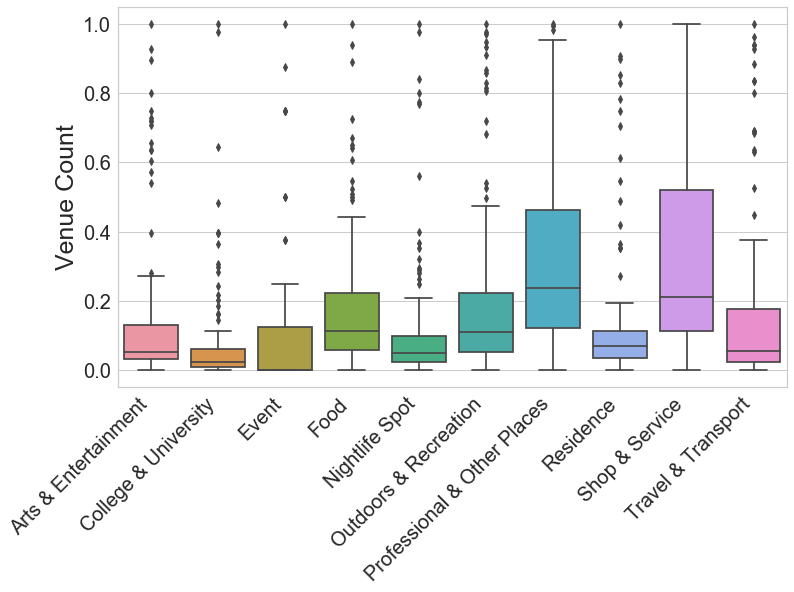

In [37]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(data = df_scaled_dataset)
ax.set_ylabel('Venue Count', fontsize=25)
ax.tick_params(labelsize=20)
ax.set_xticklabels(seattle_venues.columns[5:].values)
plt.xticks(rotation=45, ha='right')

plt.show()

From the above box plot, we can see that some venue categories have a lot of outliers. We can also see that there are a lot more professional and shop & service venues across neighborhoods. <br> <br>

Let's us look at the mean of all the categories

In [38]:
seattle_venues.mean()

Latitude                           47.622106
Longitude                        -122.328062
Current ZHVI                   825939.583333
Current ZRI                      2692.701299
Arts & Entertainment               17.166667
College & University               11.395833
Event                               0.760417
Food                               41.500000
Nightlife Spot                     16.552083
Outdoors & Recreation              33.760417
Professional & Other Places        63.437500
Residence                          13.604167
Shop & Service                     63.895833
Travel & Transport                 32.281250
dtype: float64

Drop the 'Event' cateogry as the average number of event venues is less than zero

In [39]:
df_scaled_dataset.drop('Event', 1, inplace=True)
df_scaled_dataset.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.750000,0.362903,0.726415,0.800,0.911111,0.952632,0.750000,0.911917,1.000000
1,0.031250,0.016129,0.132075,0.048,0.125926,0.236842,0.011364,0.316062,0.030303
2,0.031250,0.016129,0.117925,0.072,0.133333,0.357895,0.113636,0.227979,0.012121
3,0.041667,0.000000,0.113208,0.040,0.111111,0.015789,0.068182,0.062176,0.006061
4,0.041667,0.024194,0.014151,0.008,0.007407,0.052632,0.011364,0.015544,0.018182


Using Elbow method, find the optimum K for k-means

D:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D2808DF08>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

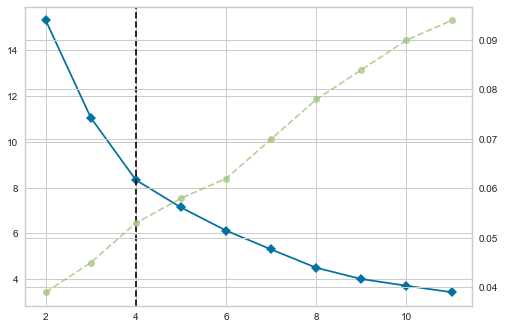

In [41]:
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df_scaled_dataset)     

In [42]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaled_dataset) 

kmeans_labels = kmeans.labels_

#add cluster info to the venues dataframe
seattle_venues_clustered = seattle_venues.copy()
seattle_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
df_scaled_clustered = df_scaled_dataset.copy()
df_scaled_clustered['Cluster'] = kmeans_labels

In [70]:
seattle_venues_clustered.to_csv('SeattleNeighborhoods_clusteredData.csv')
seattle_venues_clustered.to_excel('SeattleNeighborhoods_clusteredData.xls')
seattle_venues_clustered.head(10)

,Neighborhood,Latitude,Longitude,Current ZHVI,Current ZRI,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster
0,Downtown,47.604872,-122.333458,815000,2656.000000,73,45,6,155,100,126,184,66,178,166,2
1,Adams,47.565271,-122.279546,723500,2575.000000,4,2,1,29,6,20,48,1,63,6,0
2,Admiral,47.581195,-122.386546,834900,2840.000000,4,2,0,26,9,21,71,10,46,3,0
3,Alki,47.576209,-122.409851,880000,2842.000000,5,0,1,25,5,18,6,6,14,2,0
4,Arbor Heights,47.512899,-122.381359,624000,2350.000000,5,3,0,4,1,4,13,1,5,4,0
5,Atlantic,47.590493,-122.324313,714200,2692.701299,21,6,2,105,31,50,84,7,121,61,3
6,Beacon Hill,47.552600,-122.300900,641100,2453.000000,2,2,0,15,1,5,10,2,17,5,0
7,Belltown,47.613231,-122.345361,572000,2302.000000,97,49,7,213,105,135,145,88,173,156,2
8,Bitter Lake,47.726236,-122.348764,607800,2266.000000,9,2,0,57,5,16,51,10,79,11,0
9,Brighton,47.546210,-122.275679,577500,2380.000000,7,4,0,29,4,9,45,4,36,4,0


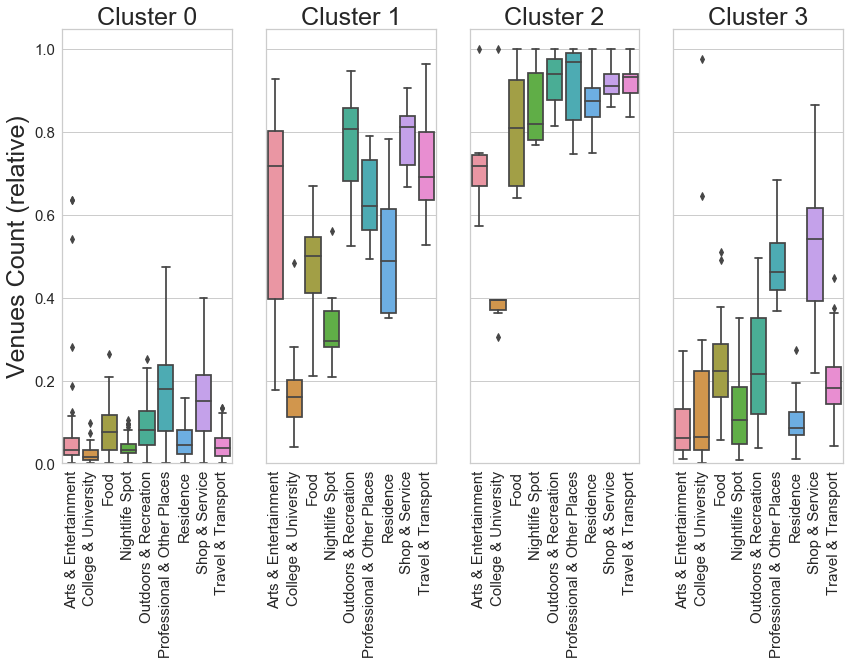

In [44]:
fig,axes= plt.subplots(1,kclusters,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Venues Count (relative)', fontsize=25)

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.05)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=15)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])
    #sns.swarmplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

#### From the above box plot, we can see that cluster 2 has the most venues for all categories, followed by cluster 1, cluster 2 and cluster 0 respectively

#### Calculate the mean of each category type for all the clusters. Also, drop columns 'Latitude', 'Longitude'.

In [45]:
cluster_data = seattle_venues_clustered.groupby('Cluster').mean()
cluster_data.drop(['Latitude', 'Longitude'], 1, inplace=True)

Add number of Neighborhoods in each cluster to the cluster_data

In [46]:
count_data = []
for i in range(0, kclusters):
    count_data.append(seattle_venues_clustered.groupby('Cluster').count().iloc[i][0])

cluster_data['#Neighorhoods'] = count_data    

Assign colors to clusters - used for mapping

In [47]:
colors = ['blue','green','red','magenta']
cluster_data['Color'] = colors

Change the order of columns, move '#Neighborhoods' and 'color' to the beginning

In [48]:
cols = ['Color', '#Neighorhoods']  + [col for col in cluster_data ]
cluster_data = cluster_data[cols]
#drop last 2 columns which are duplicates - 'Color' and '#Neighorhoods'
cluster_data = cluster_data.iloc[:, :-2]
cluster_data.round(1)

,Color,#Neighorhoods,Current ZHVI,Current ZRI,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Cluster,,,,,,,,,,,,,,
0,blue,65,856680.0,2699.7,8.1,2.4,0.2,18.1,5.0,14.9,36.7,4.5,31.4,8.4
1,green,9,674644.4,2604.8,59.3,23.4,2.1,101.8,41.4,105.7,125.7,45.2,154.9,119.4
2,red,6,685233.3,2509.1,71.7,59.0,5.8,172.3,107.5,127.7,176.2,76.8,179.5,153.0
3,magenta,16,838925.0,2782.6,10.0,23.1,0.2,53.6,15.6,34.8,94.8,9.1,101.5,35.1


#### Let's see if there is any correlation between house prices and any venue category or between any two venue categories.

In [57]:
cluster_data_analysis = cluster_data.copy()
cluster_data_analysis.drop(['Color','#Neighorhoods'], 1, inplace=True)
cluster_data_analysis.corr()

,Current ZHVI,Current ZRI,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Current ZHVI,1.000000,0.859908,-0.979281,-0.695782,-0.788724,-0.869194,-0.783058,-0.975036,-0.854180,-0.906843,-0.909006,-0.966017
Current ZRI,0.859908,1.000000,-0.932089,-0.730055,-0.924550,-0.867740,-0.890665,-0.888682,-0.758437,-0.939943,-0.723032,-0.889972
Arts & Entertainment,-0.979281,-0.932089,1.000000,0.793641,0.895402,0.936042,0.887059,0.992015,0.896331,0.971403,0.909832,0.989482
College & University,-0.695782,-0.730055,0.793641,1.000000,0.928610,0.956960,0.958629,0.837229,0.953529,0.900585,0.871366,0.856890
Event,-0.788724,-0.924550,0.895402,0.928610,1.000000,0.964845,0.995737,0.892336,0.893559,0.973831,0.814117,0.905913
Food,-0.869194,-0.867740,0.936042,0.956960,0.964845,1.000000,0.978061,0.957214,0.978598,0.984507,0.937182,0.967405
Nightlife Spot,-0.783058,-0.890665,0.887059,0.958629,0.995737,0.978061,1.000000,0.895659,0.923628,0.971281,0.844563,0.910591
Outdoors & Recreation,-0.975036,-0.888682,0.992015,0.837229,0.892336,0.957214,0.895659,1.000000,0.940545,0.971102,0.954754,0.999294
Professional & Other Places,-0.854180,-0.758437,0.896331,0.953529,0.893559,0.978598,0.923628,0.940545,1.000000,0.935059,0.978550,0.950177
Residence,-0.906843,-0.939943,0.971403,0.900585,0.973831,0.984507,0.971281,0.971102,0.935059,1.000000,0.901050,0.977453


Let's plot the neighborhoods along with their clusters on the map

In [69]:
map_clusters = folium.Map(location=[seattle_latitude, seattle_longitude], zoom_start=11)

# add markers to the map
for lat, lon, poi, cluster in zip(seattle_venues_clustered['Latitude'], seattle_venues_clustered['Longitude'], seattle_venues_clustered['Neighborhood'], seattle_venues_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Observations

* From the above correlation table too, we can see that cluster 2 (red) has the most venues for all categories, followed by cluster 1 (green) for almost all categories.
* Cluster 0 (blue) and cluster 3 (magenta) have the least number of venues. Also, these clusters have relatively higher house values compared to the other two cluster (clusters 1 and 2). This can also be observed from the correlation table as well - house prices are negatively correlated to most venue categories.
* From the above map, it is interesting to see how neighborhoods in cluster 1 and cluster 2 (cluster with the most venues) are concentrated closer to each other.
* Based on all these observations, the clusters could be classified based on the number of venues and home values using 4 levels (least, slight, moderate, high) as follows
    - Cluster 0 (blue) – Least developed, Highly expensive neighborhoods.
    - Cluster 1 (green) – Moderately developed, least expensive neighborhoods.
    - Cluster 2 (red) – Highly developed, slightly expensive neighborhoods.
    - Cluster 3 (magenta) – Slightly developed, moderately expensive neighborhoods.


Note: The input for K-means algorithm (as shown in this notebook) was the data without home and rental values (just the category venue count). However, k-means was also performed on data that included home and rental values, but the result yielded (segmentation) was identical and hence that analysis wasn't discussed or included in this final notebook.


### Conclusion

The neighborhoods in cluster 0 (blue) and cluster 3 (magenta) present most opportunities for anyone wanting to start a business as they are clearly undeveloped in terms of business venues. But, on the flipside, the neighborhoods in these two clusters might be expensive (as reflected by house values) to start a business. So, one should keep this in mind and do a thorough ROI (Return on Investment) analysis as location expenses and other operating costs could be higher in these neighborhoods.